<font size='5px' color='blue'/>Decision Tree<font/>

## 1 Packages

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [90]:
SurgeryData=pd.read_csv('kyphosis.csv')

## 2 Explore Data

In [6]:
SurgeryData.head(5)
    # It represent number of patient that has Kyphosis, and they had an opperation to correct their spine 
    # Kyphosis columns represent if the illness exist after the operation
    # Number represent the number of vertebrae involved in operation
    # Age: is the number of months for kids
    # Start the location of the top most vertebrae operated on

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
SurgeryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [12]:
SurgeryData.groupby('Kyphosis').median()

,Age,Number,Start
Kyphosis,,,
absent,79,4,14
present,105,5,6


In [13]:
SurgeryData.groupby('Kyphosis').mean()

,Age,Number,Start
Kyphosis,,,
absent,79.890625,3.750000,12.609375
present,97.823529,5.176471,7.294118


C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

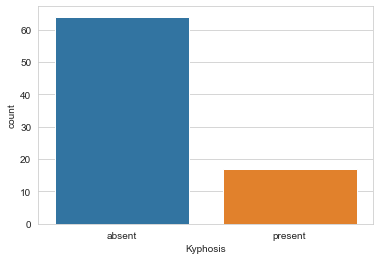

In [18]:
sns.countplot(SurgeryData['Kyphosis'])
    # Unbalanced Data

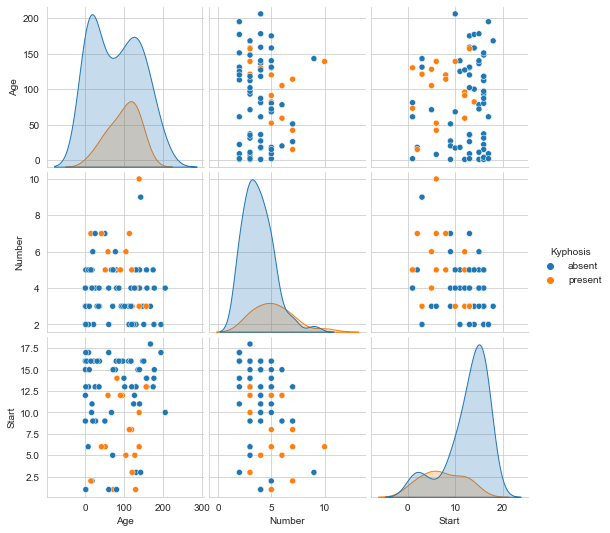

In [28]:
sns.pairplot(SurgeryData,hue='Kyphosis')

## 3 Feature Engineering

## 3.1 Missing Data 

<AxesSubplot:>

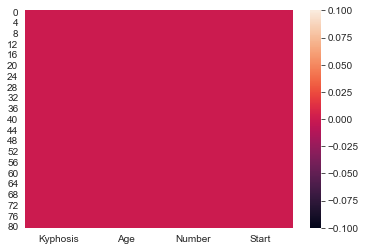

In [30]:
sns.heatmap(SurgeryData.isnull())

## 3.2 Dummy variables

In [62]:
#SurgeryData['Target']=pd.get_dummies(SurgeryData['Kyphosis'],drop_first=True)

In [63]:
#SurgeryData.drop('Kyphosis',axis=1,inplace=True)

In [113]:
#SurgeryData.head()

## 4 Preprocessing

## 4.1 Split Data

In [91]:
from sklearn.model_selection import train_test_split

In [94]:
X=SurgeryData.drop('Kyphosis',axis=1)

In [96]:
y=SurgeryData['Kyphosis']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 4.2 Scalling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
scaler.fit(X_train,y_train)

StandardScaler()

In [50]:
X_train=scaler.transform(X_train)

In [49]:
X_test=scaler.transform(X_test)

## 5 Training

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
DTC=DecisionTreeClassifier()

In [100]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

## 6 Prediction

In [101]:
y_pred=DTC.predict(X_test)

## 7 Evaluation

In [102]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [103]:
print(confusion_matrix(y_test,y_pred))

[[18  2]
 [ 2  3]]


In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [105]:
print(accuracy_score(y_test,y_pred))

0.84


<font size='5px' color='blue'/>Random Forest<font/>

## 1 Training & Prediction

In [110]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=500)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

## 2 Evaluation

In [111]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[19  1]
 [ 2  3]]


              precision    recall  f1-score   support

      absent       0.90      0.95      0.93        20
     present       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25



In [112]:
print(accuracy_score(y_test,y_pred))

0.88
